<a href="https://colab.research.google.com/github/yuvraj1841/COllab_noteBook/blob/main/Perceptron_lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Change the coefficients array and try a different polynomial instead of our  x2 .**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


random.seed(42)
np.random.seed(42)


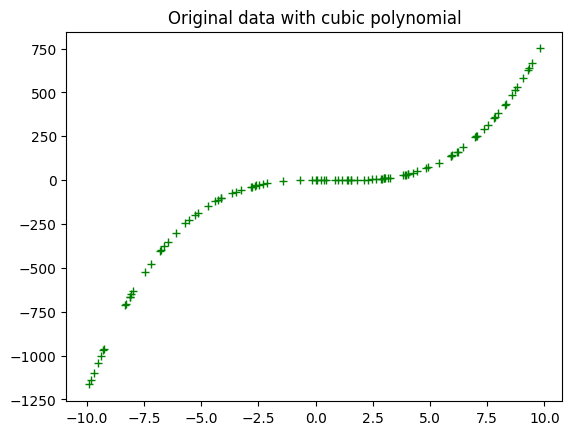

In [54]:
def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, and d for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the third degree polynomial.
    """
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs_cubic = [1, -2, 0, 1]  # Example coefficients for cubic polynomial: x^3 - 2x^2 + 1

xs = []
ys = []
for x in hundred_xs:
    y = eval_3rd_degree(coeffs_cubic, x)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, 'g+')
plt.title('Original data with cubic polynomial')
plt.show()


**2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

In [ ]:
def eval_3rd_degree(coeffs, x):
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y


In [ ]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) ** 2) / len(ys)

In [ ]:
def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_cubed = x ** 3
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x ** 2 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (y - y_bar)
        d_s.append(partial_d)

    n = len(outputs_y)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d

    new_model_coeffs = (a_new, b_new, c_new, d_new)

    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:

def gradient_descent(epochs, lr):
    losses = []
    coeffs_to_test = coeffs_quartic  # Use the coefficients for the quartic polynomial
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(coeffs_to_test, hundred_xs, ys, lr)
        coeffs_to_test = loss[1]
        losses.append(loss[0])
        if i % 500 == 0:
            print(f"Iteration {i}, Loss: {loss[0]}")

    return loss[0], loss[1], loss[2], losses

# Initialize with quartic polynomial coefficients
coeffs_quartic = [1, -3, 0, 2, 1]  # Example coefficients for quartic polynomial

# Try different learning rates
lr_low = 0.00001
lr_medium = 0.001
lr_high = 0.1

# Run gradient descent with different learning rates
GD_low_lr = gradient_descent(5000, lr_low)
GD_medium_lr = gradient_descent(5000, lr_medium)
GD_high_lr = gradient_descent(5000, lr_high)

Iteration 0, Loss: 2058.6883087807214
Iteration 500, Loss: inf


<ipython-input-22-aedaaf91c36f>:10: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-22-aedaaf91c36f>:10: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-22-aedaaf91c36f>:33: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-22-aedaaf91c36f>:34: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-22-aedaaf91c36f>:36: RuntimeWarning: invalid value encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-22-aedaaf91c36f>:38: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan
Iteration 0, Loss: 4685290.457304962
Iteration 500, Loss: nan


<ipython-input-22-aedaaf91c36f>:22: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_cubed * (y - y_bar)
<ipython-input-22-aedaaf91c36f>:34: RuntimeWarning: overflow encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-22-aedaaf91c36f>:35: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)
<ipython-input-22-aedaaf91c36f>:6: RuntimeWarning: invalid value encountered in add
  y = a + b + c + d


Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan
Iteration 0, Loss: 47305775832.77285
Iteration 500, Loss: nan
Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan


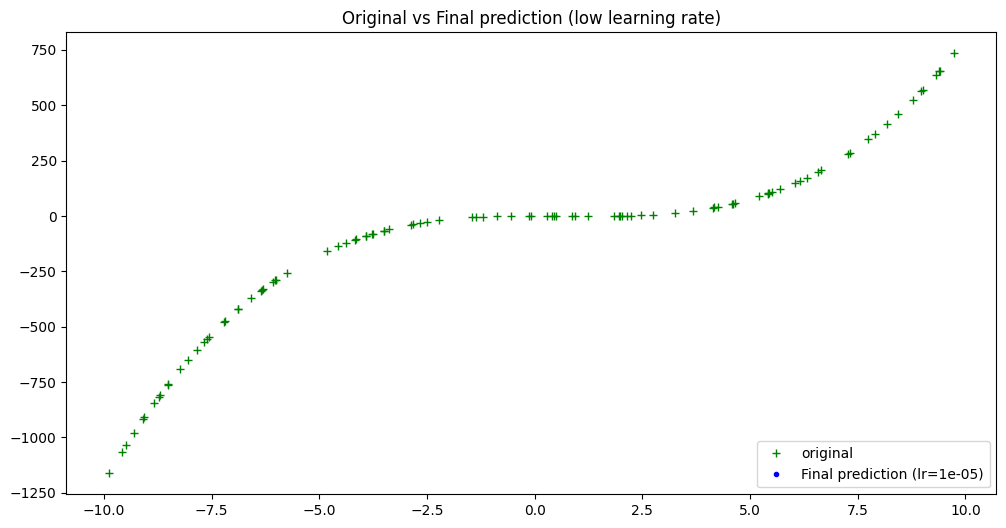

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_low_lr[2], 'b.', label=f'Final prediction (lr={lr_low})')
plt.title('Original vs Final prediction (low learning rate)')
plt.legend(loc="lower right")
plt.show()

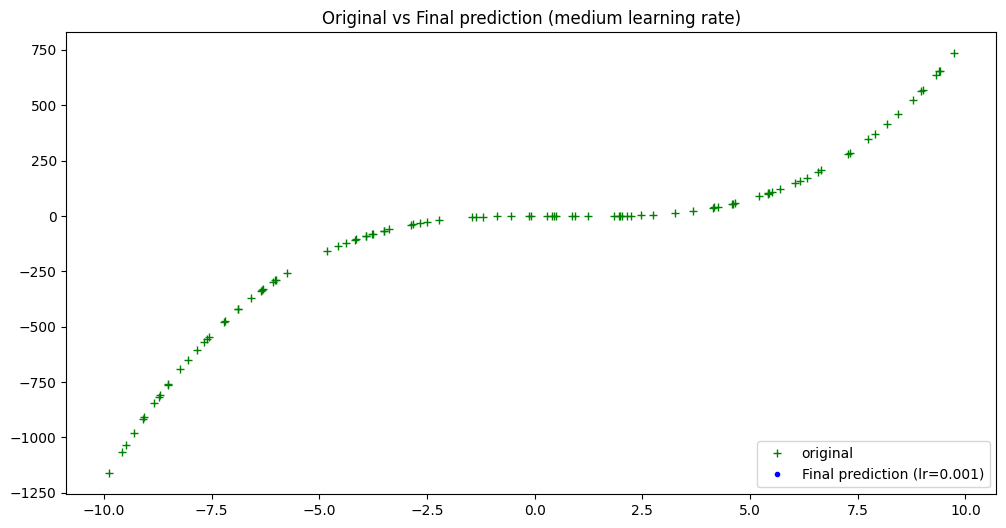

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_medium_lr[2], 'b.', label=f'Final prediction (lr={lr_medium})')
plt.title('Original vs Final prediction (medium learning rate)')
plt.legend(loc="lower right")
plt.show()


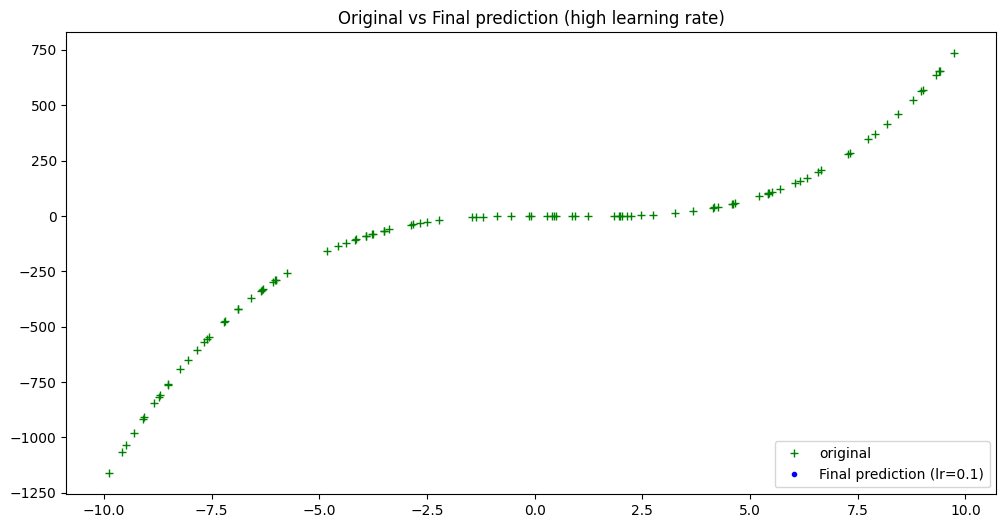

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_high_lr[2], 'b.', label=f'Final prediction (lr={lr_high})')
plt.title('Original vs Final prediction (high learning rate)')
plt.legend(loc="lower right")
plt.show()


**3.Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?**

In [ ]:
def eval_5th_degree(coeffs, x):
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

In [ ]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_to_5 = x ** 5
        partial_a = x_to_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x ** 4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x ** 3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x ** 2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(outputs_y)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    losses = []
    coeffs_to_test = coeffs_degree_5  # Use the coefficients for the degree 5 polynomial
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(coeffs_to_test, hundred_xs, ys, lr)
        coeffs_to_test = loss[1]
        losses.append(loss[0])
        if i % 500 == 0:
            print(f"Iteration {i}, Loss: {loss[0]}")

    return loss[0], loss[1], loss[2], losses

# Initialize with degree 5 polynomial coefficients
coeffs_degree_5 = [1, -6, 11, -6, 1, 0]  # Example coefficients for degree 5 polynomial

# Try different learning rates
lr_medium = 0.001

# Run gradient descent with different initializations
GD_init_1 = gradient_descent(5000, lr_medium)
GD_init_2 = gradient_descent(5000, lr_medium)
GD_init_3 = gradient_descent(5000, lr_medium)

Iteration 0, Loss: 2.690938747197918e+21


<ipython-input-28-7aef3dc5c460>:2: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-28-7aef3dc5c460>:2: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-46-eda26d8e572f>:28: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-46-eda26d8e572f>:29: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-46-eda26d8e572f>:31: RuntimeWarning: invalid value encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-46-eda26d8e572f>:33: RuntimeWarning: invalid value encountered in double_scalars
  gradient_f = (-2 / n) * sum(f_s)
<ipython-input-46-eda26d8e572f>:35: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


Iteration 500, Loss: nan
Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan
Iteration 0, Loss: 2.690938747197918e+21
Iteration 500, Loss: nan
Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan
Iteration 0, Loss: 2.690938747197918e+21
Iteration 500, Loss: nan
Iteration 1000, Loss: nan
Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan


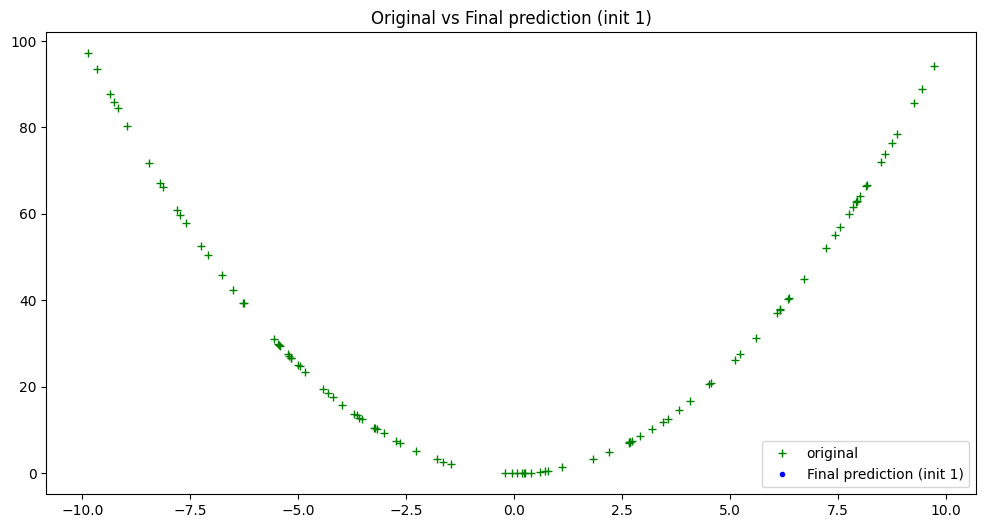

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_init_1[2], 'b.', label=f'Final prediction (init 1)')
plt.title('Original vs Final prediction (init 1)')
plt.legend(loc="lower right")
plt.show()

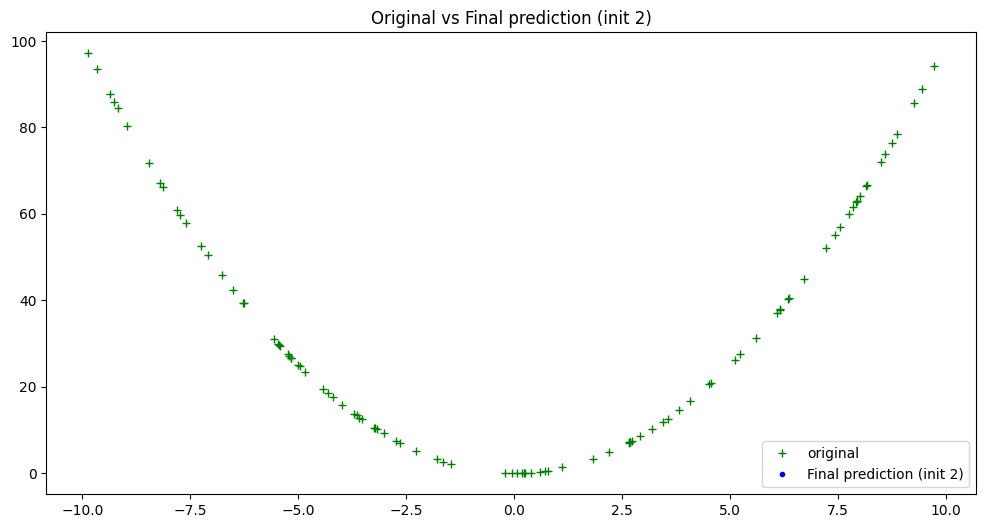

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_init_2[2], 'b.', label=f'Final prediction (init 2)')
plt.title('Original vs Final prediction (init 2)')
plt.legend(loc="lower right")
plt.show()

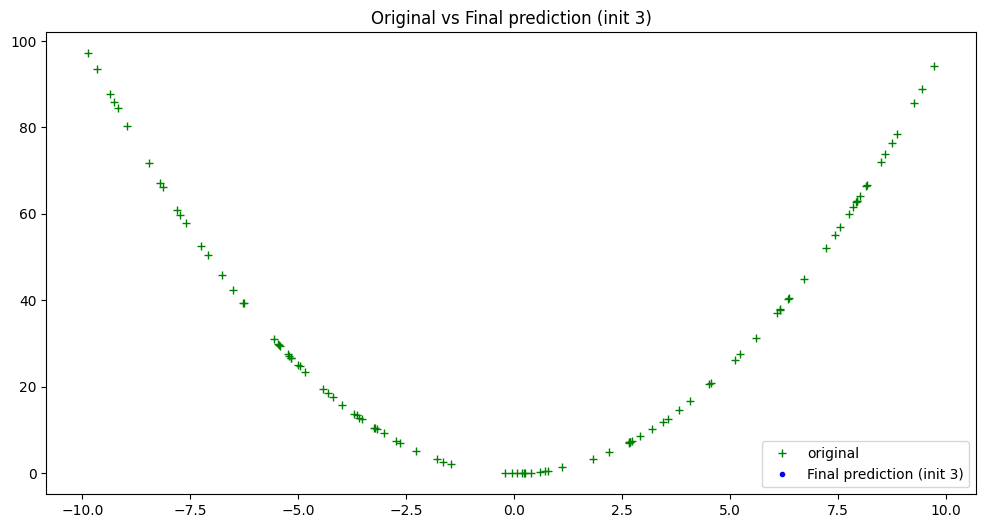

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD_init_3[2], 'b.', label=f'Final prediction (init 3)')
plt.title('Original vs Final prediction (init 3)')
plt.legend(loc="lower right")
plt.show()

**4.Can you modify the algorithm to find a maxima of a function, instead of a minima?**


In [ ]:
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_squared = x ** 2
        partial_a = x_squared * (y_bar - y)  # Change the sign here
        a_s.append(partial_a)
        partial_b = x * (y_bar - y)
        b_s.append(partial_b)
        partial_c = (y_bar - y)
        c_s.append(partial_c)

    n = len(outputs_y)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    a_new = coeffs[0] + lr * gradient_a  # Change the sign here
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
        if i % 500 == 0:
            print(f"Iteration {i}, Loss: {loss[0]}")

    return loss[0], loss[1], loss[2], losses


In [ ]:
# Randomly initialize coefficients
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))

# Try different learning rates
lr_medium = 0.001

# Run gradient descent
GD_maxima = gradient_descent(5000, lr_medium)

Iteration 0, Loss: 831859.9323057677
Iteration 500, Loss: inf
Iteration 1000, Loss: nan


<ipython-input-28-7aef3dc5c460>:2: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-28-7aef3dc5c460>:2: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-34-c42a6841960e>:19: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-34-c42a6841960e>:20: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-34-c42a6841960e>:23: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] + lr * gradient_a  # Change the sign here


Iteration 1500, Loss: nan
Iteration 2000, Loss: nan
Iteration 2500, Loss: nan
Iteration 3000, Loss: nan
Iteration 3500, Loss: nan
Iteration 4000, Loss: nan
Iteration 4500, Loss: nan


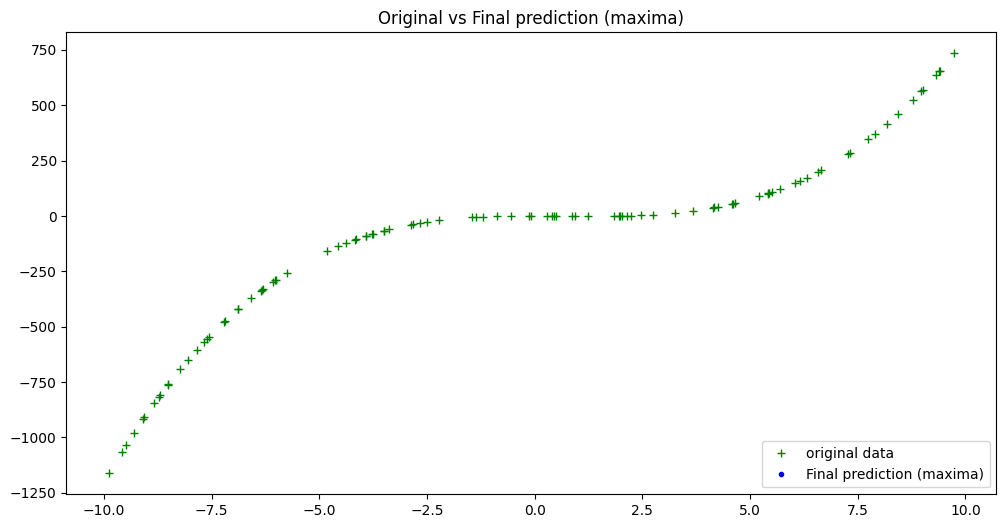

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, ys, 'g+', label='original data')
plt.plot(hundred_xs, GD_maxima[2], 'b.', label=f'Final prediction (maxima)')
plt.title('Original vs Final prediction (maxima)')
plt.legend(loc="lower right")
plt.show()

**Representation of data in the form of a plot after adding jitter**

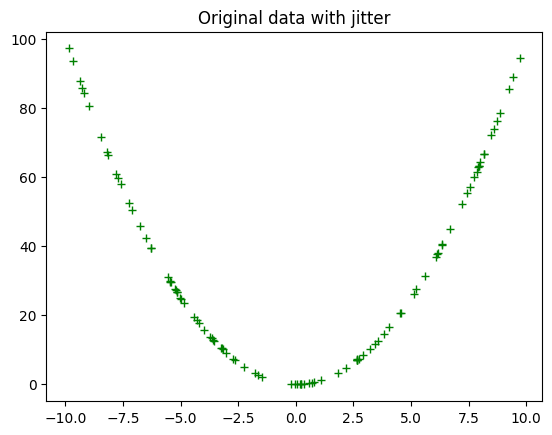

In [ ]:
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

def eval_2nd_degree_jitter(coeffs, x, j):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    # Add jitter to the output y within the range [y - j, y + j]
    jitter = random.uniform(-j, j)
    y_with_jitter = y + jitter

    return y_with_jitter

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

# Generate data with jitter
xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

# Plot original and jittered data
plt.plot(xs, ys, 'g+', label='Original data with jitter')
plt.title('Original data with jitter')
plt.show()